In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Pixel Replication
NewImage=(InputRows)(zoomFactor),(InputCols)(zoomFactor)

In [2]:
def pixel_replication_zoom(original_image, zoom_factor):
    
    original_height, original_width, _ = original_image.shape
    new_width = int(original_width * zoom_factor)
    new_height = int(original_height * zoom_factor)
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Apply pixel replication zooming
    for x in range(new_width):
        for y in range(new_height):
            original_x = int(x / zoom_factor)
            original_y = int(y / zoom_factor)

            # Get the pixel value from the original image
            pixel = original_image[original_y, original_x]

            # Set the pixel value in the zoomed image
            zoomed_image[y, x] = pixel

    return zoomed_image

In [3]:
# Example for Pixel Replication
image_path = "Image BW.jpg"
zoom_factor = 2

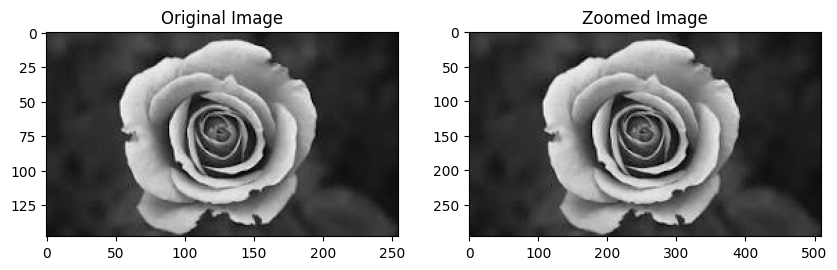

In [4]:
#  Showing the results using pixel Replication
original_image = cv2.imread(image_path)
zoomed_image = pixel_replication_zoom(original_image, zoom_factor)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
plt.title('Zoomed Image')

plt.show()

# Zero order-Hold
NewImage=(2(no.ofRows)−1)∗(2(no.ofCols)−1)

In [5]:
def zero_order_hold_zoom_image(image):
    # Get the image dimensions
    height, width, channels = image.shape

    # Create a new image with increased dimensions
    zoomed_image = np.zeros((2 * height - 1, 2 * width - 1, channels), dtype=image.dtype)

    # Apply zero-order hold row-wise
    for y in range(height-1):
        for x in range(width - 1):
            zoomed_image[2*y, 2*x, :] = image[y, x, :]
        
        for x in range(width - 1):
            zoomed_image[2*y, 2*x+1, :] = image[y, x, :]
       
              
    # Apply zero-order hold column-wise
    for y in range(height - 1):
        for x in range(2 * width - 1):
            zoomed_image[2*y + 1, x, :] = (zoomed_image[2*y, x, :] + zoomed_image[2*y + 2, x, :]) // 2
            

    # # Copy the last row as is
    # zoomed_image[-1, :, :] = image[-1, :, :]

    return zoomed_image

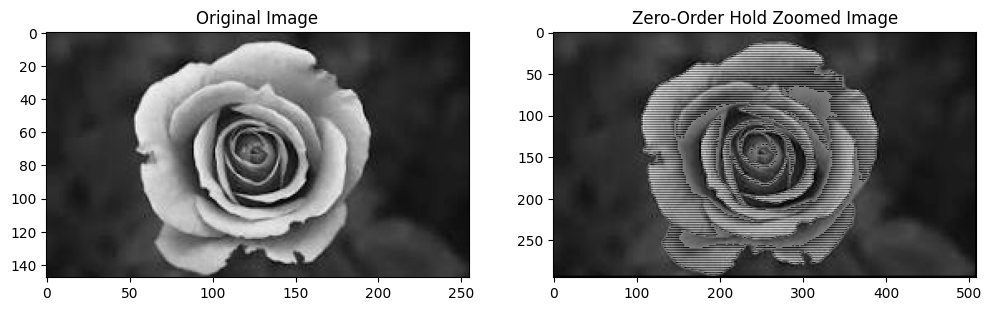

In [6]:
# Zero order hold Example :
image_path = "Image BW.jpg"
original_image = cv2.imread(image_path)
zoomed_image = zero_order_hold_zoom_image(original_image)

# Display the original and zoomed images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
plt.title('Zero-Order Hold Zoomed Image')

plt.show()


## K-Times Zooming

In [7]:
def k_times_zoom(image_path, k):
    
    original_image = cv2.imread(image_path)
    image_array = np.array(original_image)
    height, width, _ = image_array.shape
    zoomed_image = np.zeros((height, width * 2, 3), dtype=np.uint8)

    for i in range(height):
        for j in range(0, width * 2 - 1, 2):
            pixel1 = image_array[i, j // 2]
            pixel2 = image_array[i, min(j // 2 + 1, width - 1)]
            
            op = np.abs(np.subtract(pixel1, pixel2))
            op = op.astype(np.float64) / k

            zoomed_pixel = (pixel1.astype(np.float64) + op).astype(np.uint8)
            zoomed_image[i, j] = pixel1
            zoomed_image[i, j + 1] = zoomed_pixel
    
    #plotting the figures
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
    plt.title('Zoomed Image')

    plt.show()


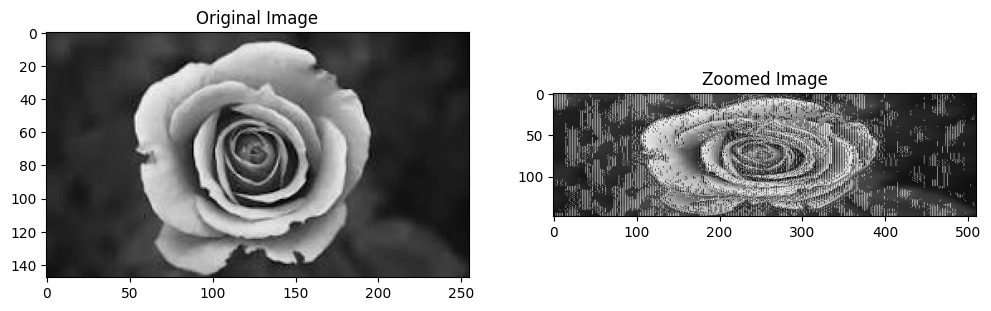

In [8]:
# K-Times zoom Example
image_path = "Image BW.jpg"
zoom_factor = 2 
k_times_zoom(image_path, zoom_factor)

# RGB to Grayscale image converting 

using standard luminosity formula grayscale = 0.299 * r + 0.587 * g + 0.114 * b

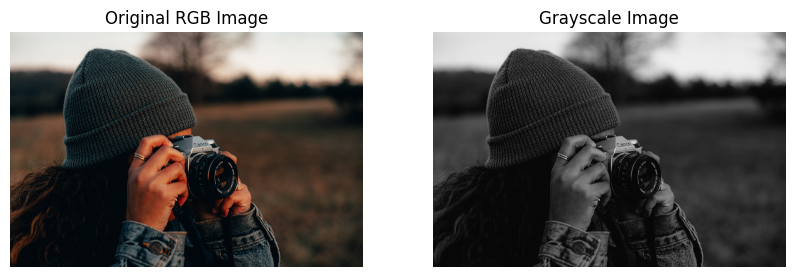

In [9]:
def rgbToGray(img):
    new_img = np.zeros_like(img)
    shape = img.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            r = img[i][j][0]
            g = img[i][j][1]
            b = img[i][j][2]
            grayscale = 0.299 * r + 0.587 * g + 0.114 * b
            for k in range(3):
                new_img[i][j][k] = grayscale

    return new_img.astype(np.uint8)

# Example for conversion:
img_path = 'Image.jpg'
rgb_image = cv2.imread(img_path)

gray_image = rgbToGray(rgb_image)
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

# Brightness Manipulation

In [17]:
from PIL import Image

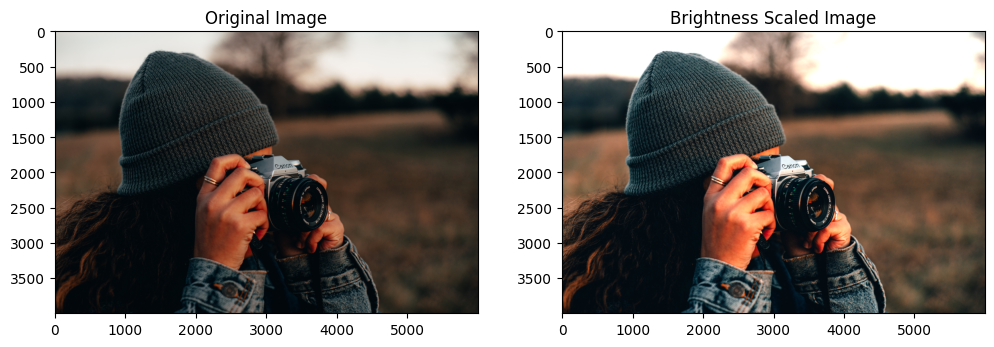

In [18]:
def boundedPixelValue(color, brightnessFactor):
    scaledValue = float(color * (1 + brightnessFactor))
    if scaledValue < 0:
        return 0
    elif scaledValue > 255:
        return 255

    return int(scaledValue)

im = Image.open("Image.jpg")   
out = Image.new('RGB', im.size, 0xffffff)

#constant brightness factor of 0.5
brightnessFactor = 0.5

width, height = im.size
for x in range(width):
    for y in range(height):
        r, g, b = im.getpixel((x, y))

        updatedR = boundedPixelValue(r, brightnessFactor)
        updatedG = boundedPixelValue(g, brightnessFactor)
        updatedB = boundedPixelValue(b, brightnessFactor)

        out.putpixel((x, y), (updatedR, updatedG, updatedB))

processed_image = out.copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(im)
axes[0].set_title("Original Image")

axes[1].imshow(processed_image)
axes[1].set_title("Brightness Scaled Image")

plt.show()